# Notebook to produce NDVI differences from wet,dry years for region

## Dependencies:
- Recoded to use python 3 17/03/17
- lat long extents or polygon
- veg_cover.py saved in an appropriate location to calculate the geomedian based on either polygon or lat longs

## Outputs:
- can output to netcdf and/or geotiff

#### First, set up some variables to pass to veg_cover.py and run the geomedian code:

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec 
from datacube.storage.storage import write_dataset_to_netcdf

In [2]:
#change these to the region you need

LON="--lon_range '(145.35, 145.45)'" #minlon, maxlon
LAT="--lat_range '(-20.00, -20.10)'" #maxlat, minlat
#POLY="--poly '../../BurData/Burdekin_River_shp/Burdekin_River_NCBL2.shp'" #bex update to BigPoly
YEAR="--year_range 1987-2013"  # requirement mandatory
#EPOCH="--epoch 5" #default epoch 40
#MNTH="--mnt_range '5,10"  # Default 7,11
RF_RANGE_L="--rf_range_low '1992,1994,2002'" #dry year/s
RF_RANGE_H="--rf_range_high '2007,2008,2010,2011'" #wet year/s
DEB="--debug"   # To get detail of date/time and tide heights
# LS7FL="--ls7fl"  To include LS7 datasets

#remember to change the $to include parsing the variables you want $POLY 
#next line runs the geomedian for the specified input variables
%run ../From_Bis_010317/veg_cover.py $LON $LAT $YEAR $RF_RANGE_L $RF_RANGE_H $DEB

Input date range 1987-2013
running task for epoch 1987-01-01 TO 2013-12-31 for lon/lat range (145.35, 145.45)(-20.00, -20.10) epoch 40  at12:22:10.182193
 doing for sensor ls5_nbar_albers
 epoch end date is reset for LS5 2011/12/01
 doing for sensor ls7_nbar_albers
 epoch end date is reset for LS7 2003/03/01
 doing for sensor ls8_nbar_albers
 loaded nbar dry and wet data from 7 to 11 months 12:25:28.272747

Dry date list ['1992-07-16', '1992-08-01', '1992-08-17', '1992-09-02', '1992-09-18', '1992-10-04', '1992-10-20', '1992-11-05', '1992-11-21', '1994-07-06', '1994-07-22', '1994-08-07', '1994-08-23', '1994-09-08', '1994-09-24', '1994-10-10', '1994-11-11', '2002-07-05', '2002-07-21', '2002-08-06', '2002-08-22', '2002-09-07', '2002-09-23', '2002-10-25', '2002-11-10', '2002-11-26']

Wet date list['2007-07-27', '2007-08-12', '2007-08-28', '2007-09-13', '2007-09-29', '2008-08-14', '2008-08-30', '2008-09-15', '2008-10-01', '2008-10-17', '2008-11-02', '2008-11-18', '2010-07-19', '2010-10-23',

In [3]:
#in changing to python 3, changed iterkeys to keys
dry_key =''
for k in sorted(MY_GEO.keys()):
    #print(dry_key, 'is dry key', dry_key[:], 'is dry values')
    print(k, 'is k')

GEO_1987-01-01_2013-12-31_DRY is k
GEO_1987-01-01_2013-12-31_WET is k


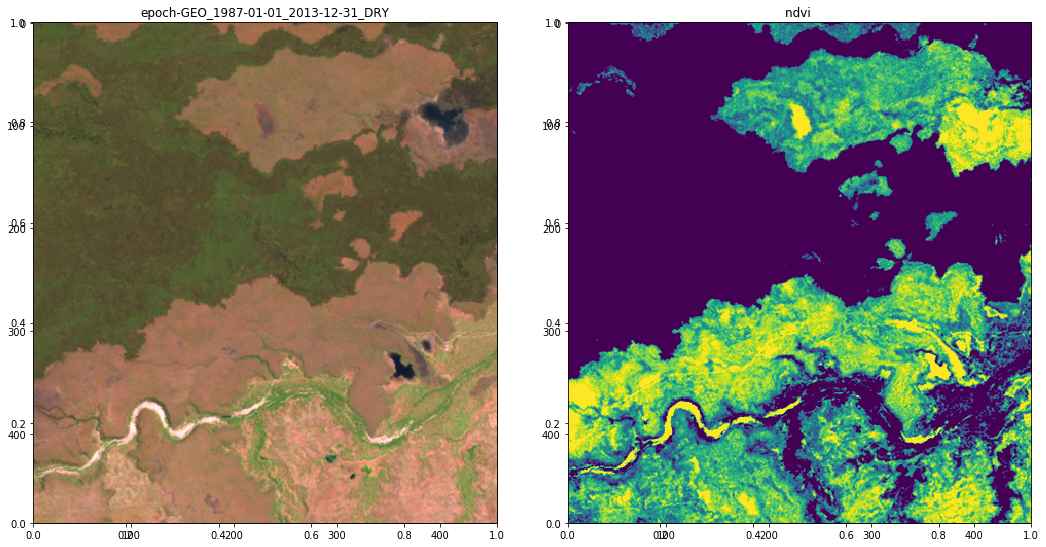

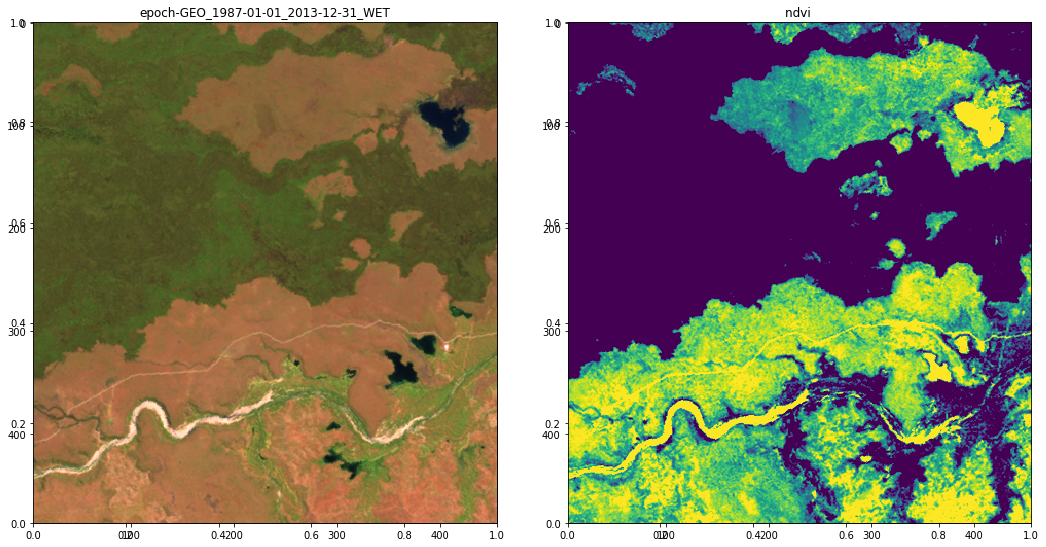

In [4]:
gs1 = GridSpec(1, 2)
fake_saturation = 4500 
dry_key =''
#so k here is wet and dry? bex
for k in sorted(MY_GEO.keys()):
    
    #set up false colour plot and max and min on image to scale image  
    Z = MY_GEO[k].to_array(dim='color').sel(color=['swir1', 'nir', 'green']).transpose('y', 'x', 'color')
    clipped_visible = Z.where(Z<fake_saturation).fillna(fake_saturation)
    max_val = clipped_visible.max(['y', 'x'])
    min_val = clipped_visible.min(['y', 'x'])
    scaled = (clipped_visible / max_val)
    
    #subplots running with gridspec here. #FIXME sharey not working
    #fig, axes = plt.subplots(1,3, figsize=(20,8))
    fig, axes = plt.subplots(1,2, figsize=(15,8))
    ax1 = fig.add_subplot(gs1[0])
    ax2 = fig.add_subplot(gs1[1], sharey=ax1)
    #ax3 = fig.add_subplot(gs1[2], sharey=ax1)
   
    #bex: here I changed clipped_visible to 'ndvi' 
    ax1.set_title('epoch-'+k )
    ndvi = ((MY_GEO[k].nir - MY_GEO[k].red) /(MY_GEO[k].nir + MY_GEO[k].red))  #- \
    #            ((high_dict.green -high_dict.nir)/(high_dict.green + high_dict.nir))
    ax1.imshow(scaled, interpolation='nearest', cmap = 'viridis_r', vmin = min_val, vmax = max_val)
   
    #clipped_visible = ndwi_diff.where(ndwi_diff<fake_saturation).fillna(fake_saturation)
    max_val = ndvi.max(['y', 'x'])
    mid_val = ndvi.median(['y', 'x'])
    scaled_ndvi = (ndvi / max_val)
    ax2.imshow(scaled_ndvi, interpolation='nearest', cmap = 'viridis_r', vmin = mid_val, vmax = max_val)
    ax2.set_title('ndvi ')
    #plt.imshow(scaled_ndvi, interpolation='nearest', cmap='BuGn')
    #ax2.imshow(scaled_ndvi)
    #ax3.set_title('ndvi count')
   
    #scaled.plot.hist(ax=ax3)   
    #plt.xlim(100, 300)
    plt.tight_layout()
    plt.show()
    

In [5]:
dry_key =''
for k in sorted(MY_GEO.keys()):
    if "DRY" in k:
        high_dict  =  MY_GEO[k] 
        dry_key = k
        continue
    print(k)

GEO_1987-01-01_2013-12-31_WET


In [6]:
#change to NDVI throughout
#MY_GEO is a dictionary containing wet and dry geomedians
for k in sorted(MY_GEO.keys()):
    if "DRY" in k:
        #here bex changes high_dict to dry_dict
        dry_dict  =  MY_GEO[k] 
        dry_key = k
        continue
    print (k)
    print (dry_key)
    wet_key = k
    print (wet_key)

GEO_1987-01-01_2013-12-31_WET
GEO_1987-01-01_2013-12-31_DRY
GEO_1987-01-01_2013-12-31_WET


In [7]:
#this code from Neil Symington's Keep River analyis
#First define the colour stretchd
import matplotlib as mpl
ndvi_cmap = mpl.colors.ListedColormap(['darkslategray','#946B33' , '#8F7033' , '#8A7533' , '#857A33', '#808033',
                                      '#7A8533', '#758A33', '#708F33', '#6B9433', '#669933', '#619E33', '#5CA333',
                                      '#57A833', '#52AD33', '#4CB233', '#47B833', '#42BD33', '#3DC233', '#38C733',
                                      '#33CC33', '#30C430', '#2EBD2E', '#2BB52B', '#29AD29', '#26A626', '#249E24', 
                                      '#219621', '#1F8F1F', '#1C871C', '#1A801A', '#177817', '#147014', '#126912',
                                      '#0F610F', '#0D590D', '#0A520A', '#084A08', '#054205', '#033B03', '#003300'])
#Define the colourmap using even breaks in the data

a = all_ndvi_sorted.isel(time = time_slice).values.flatten()

ndvi_bounds = [-1, 0]

p = np.linspace(5,95, 39)

for perc in p:
    ndvi_bounds.append(np.percentile(a, perc))

ndvi_norm = mpl.colors.BoundaryNorm(ndvi_bounds, ndvi_cmap.N)

NameError: name 'all_ndvi_sorted' is not defined

In [ ]:
gs2 = GridSpec(1,3)

#change to NDVI throughout
for k in sorted(MY_GEO.keys()):
    #so dry_key and k are not the same, but dry_key is k iff DRY is in k
    if "DRY" in k:
        #here bex changes high_dict to dry_dict
        dry_dict  =  MY_GEO[k] 
        dry_key = k
        continue
    #bex: identifying that not dry is in fact wet..    
    wet_key = k    
    wet_dict = MY_GEO[wet_key]    
   
    Z = dry_dict.to_array(dim='color').sel(color=['swir1', 'nir', 'green']).transpose('y', 'x', 'color')
    #have no idea where fake saturation comes from #FIXME bex (guessing we are getting rid of nans?)
    clipped_visible = Z.where(Z<fake_saturation).fillna(fake_saturation)  
    
    #finding the maximum value of the dry dict?
    max_val = clipped_visible.max(['y', 'x'])
    #changed scaled_high to scaled_dry (bex)
    #I think here bis divides through the dry dictionary by the maximum value - rescaling? 
    scaled_dry = (clipped_visible / max_val) 
    
    #here bis does the same thing again, except calls it scaled because it does the wet.
    Z = wet_dict.to_array(dim='color').sel(color=['swir1', 'nir', 'green']).transpose('y', 'x', 'color')
    clipped_visible = Z.where(Z<fake_saturation).fillna(fake_saturation)
    max_val = clipped_visible.max(['y', 'x'])
    scaled = (clipped_visible / max_val)
    
    #making a plot
    #fig, axes = plt.subplots(1,4, figsize=(20,8))
    fig = plt.figure(figsize = (20,8))
    ax1 = fig.add_subplot(gs2[0])
    ax2 = fig.add_subplot(gs2[1], sharey=ax1)
    ax3 = fig.add_subplot(gs2[2], sharey=ax1)
    #ax4 = fig.add_subplot(gs1[3])
    
    ax1.axis('off') 
    ax2.axis('off')
    ax3.axis('off')
    
    #why not using dry_key? instead of k? #bex changes var name to ndvi_diff as calc is ndvi
    #here we calculate ndvi for dry geomedian
    #this is actually just ndvi wet not ndvi diff so bex changes again..
    ndvi_wet = ((wet_dict.nir - wet_dict.red) /(wet_dict.nir + wet_dict.red)) 
    #here we run into not knowing which keys are the wet keys...
    ndvi_dry = ((dry_dict.nir - dry_dict.red) /(dry_dict.nir + dry_dict.red)) 
    ndvi_diff = ndvi_wet - ndvi_dry
       
    #ndwi_diff = ((high_dict.nir - high_dict.red)/ (high_dict.nir+high_dict.red))
    #plots wet
    ax1.imshow(scaled, interpolation='nearest')
    ax1.set_title('epoch-'+k )
    ax2.set_title(dry_key)
    #plots dry
    ax2.imshow(scaled_dry, interpolation='nearest')
    
    #fixme: max is local: bex/leo
    clipped_visible = ndvi_diff.where(ndvi_diff<fake_saturation).fillna(fake_saturation)
    max_val = clipped_visible.max(['y', 'x'])
    mean_val = clipped_visible.mean(['y', 'x'])
    min_val = clipped_visible.min(['y', 'x'])
    med_val = clipped_visible.median(['y', 'x'])
    #take 95th percentile in space
    percentile_val = clipped_visible.quantile(0.95,dim =['y', 'x'])

    scaled = (clipped_visible / max_val)
    # plt.imshow(scaled, interpolation='nearest', cmap='BuGn')
    ax3.imshow(scaled, cmap = 'viridis_r', vmin = 0.2, vmax = 1) 
    ax3.set_title('ndvi diff of wet dry')
   
    #scaled.plot.hist(ax=ax4)
    #plt.xlim(100, 300)
    plt.show()
    #plt.savefig('ndvi_diff_wall1.jpg',format = 'jpg' ) #broken
    

Now write the NDVI difference image to file as either netCDF or GeoTIFF

In [ ]:
#get the date range from the geomedian dictionary key to use in the filename
date_range = str(k[4:-4])
print (date_range)

In [ ]:
#get the original nbar dataset attributes (crs)
#set up variable attributes to hold the attributes from wet_dict
attrs = wet_dict
#get the band info
bands = attrs.data_vars.keys()
print (bands)
for i in bands:
    #drop band data, retaining just the attributes
    attrs =attrs.drop(i)
#set up new variable called ndvi_var, and assign attributes to it in a dictionary
ndvi_var = {'ndvi-diff':''}
attr_data = attrs.assign(**ndvi_var)
attr_data['ndvi-diff'] = ndvi_diff

uncomment the cell below to write to netCDF format. change the filename and path to save to your chosen location.

In [ ]:
outfile = '/g/data/r78/rjd547/working/' + 'BasaltWall3' + date_range + '_' + 'NDVI_DIFF' + '.nc'
write_dataset_to_netcdf(attr_data,  variable_params={'ndvi-diff': {'zlib':True}}, filename=outfile)
print ('wrote: '+outfile+' to netcdf')

uncomment the cell below to write to geotiff format. again, change the filename and path if desired.
    Be aware writing to geotiff takes much longer than writing to netcdf!

In [ ]:
#this function definition comes from CK's Principal_Component_Analysis_AGDC_looped notebook, and before that from AGDC recipes.
def write_geotiff(filename, dataset, time_index=None, profile_override=None):
    """
    Write an xarray dataset to a geotiff
    :attr bands: ordered list of dataset names
    :attr time_index: time index to write to file
    :attr dataset: xarray dataset containing multiple bands to write to file
    :attr profile_override: option dict, overrides rasterio file creation options.
    """
    profile_override = profile_override or {}

    dtypes = {val.dtype for val in dataset.data_vars.values()}
    assert len(dtypes) == 1  # Check for multiple dtypes

    profile = DEFAULT_PROFILE.copy()
    profile.update({
        'width': dataset.dims['x'],
        'height': dataset.dims['y'],
        #'affine': dataset.affine, #changed following line 17/03/17 due to changes in AGDC I think
        'transform': dataset.affine,
        'crs': dataset.crs.crs_str,
        #'crs': dataset.crs,
        'count': len(dataset.data_vars),
        'dtype': str(dtypes.pop())
    })
    profile.update(profile_override)

    with rasterio.open(filename, 'w', **profile) as dest:
        for bandnum, data in enumerate(dataset.data_vars.values(), start=1):
            #dest.write(data.isel(time=time_index).data, bandnum)
            dest.write(data, bandnum)
            print ('Done')

In [ ]:
#help(write_geotiff)
outfile = '/g/data/r78/rjd547/working/' + 'BasaltWalltestcrs' + date_range + '_' + 'NDVI_DIFF' + '.tiff'
#print(attr_data)
#help(write_geotiff)
write_geotiff(outfile, attr_data)
print ('tiff writing complete')

In [ ]:

    # plt.imshow(scaled, interpolation='nearest', cmap='BuGn')
#plt.imshow(scaled, cmap = 'viridis_r', vmin = 0, vmax = 1) 
#plt.set_title('ndvi diff of wet dry')
   
    #scaled.plot.hist(ax=ax4)
    #plt.xlim(100, 300)
#plt.show()
    #plt.savefig('ndvi_diff_wall1.jpg',format = 'jpg' ) #broken
    

In [ ]:
#check differences here - this plot is (NOT scaled? - bex)

#ndvi_diff.plot(cmap = 'viridis_r', vmin = 0.0, vmax = 1, figsize =(8,8)) 
#plt.show()

In [ ]:
#print max_val
#print med_val
#print "percentile 99" 
#print percentile_val